Load the wigxjpf library and set the MAXSPIN we want to reach in our computations

In [2]:
import pywigxjpf as wig
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,7.5)

In [3]:
MAXSPIN = 300

Precompute the {6j} symbols. Notice that to ask for spin j you need to use 2*j, in this way they deal with half integers

In [4]:
wig.wig_table_init(MAXSPIN,6)
wig.wig_temp_init(MAXSPIN)

In [5]:
jj1,jj2,jj3= 2,2,2

Very inefficient! Improve it as an exercize

In [6]:
bulkspins=np.array(np.meshgrid(range(0,10),range(0,10),range(0,10))).T
def vert(jj4,jj5,jj6):
    return (2*jj4+1)*(2*jj5+1)*(2*jj6+1)* wig.wig6jj(jj1,jj2,jj3, jj4,jj5,jj6)**2

In [7]:
from itertools import product

In [8]:
def cutoff_sum(K):
    values = list(product(range(K-1), range(K-1), [K]))+list(product(range(K-1), [K],range(K-1)))+list(product([K],range(K-1), range(K-1)))
    return np.sum([vert(jj4,jj5,jj6) for jj4,jj5,jj6 in values])


In [9]:
cutoff_list = np.arange(MAXSPIN)
tmp=np.array(list(map(cutoff_sum,cutoff_list)))
y = np.array(list(map(lambda k : np.sum(tmp[:k]),cutoff_list)))

In [10]:
test = lambda L : 12 * L**3

In [11]:
testList = np.array(list(map(test,cutoff_list[10:]/2)))

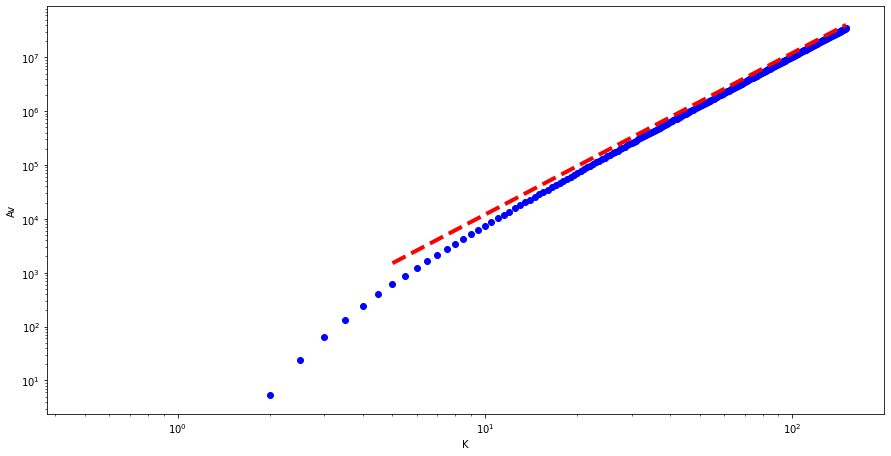

In [12]:
plt.xlabel("K")
plt.ylabel("Av")
plt.loglog(cutoff_list/2, np.abs(y), 'o', color='blue')
plt.loglog(cutoff_list[10:]/2, testList, '--', color='red',linewidth=4.0)
plt.savefig("bubble.svg")
plt.show()